In [23]:
import numpy as np
import random
import networkx as nx
import matplotlib.pyplot as plt
from scipy.stats import kendalltau
from scipy.stats import spearmanr
from scipy import stats
# from sklearn.decomposition import PCA
import seaborn as sns
import random
import sys
import copy
from igraph import *
import time
import numpy as np
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD

In [24]:
g = Graph.Read_Ncol("moreno_innovation", directed = False)
with open('redes e centralidades/centralidades-moreno_innovation-picke.txt', 'rb') as f:
    centralidade_list = pickle.load(f)

In [25]:
for i in centralidade_list:
    
    print sorted(i,reverse=True)[:10],'\n'

[0.14166666666666666, 0.125, 0.10833333333333334, 0.09166666666666666, 0.0875, 0.08333333333333333, 0.08333333333333333, 0.07916666666666666, 0.07916666666666666, 0.07916666666666666] 

[0.015428116257902795, 0.014893273699691864, 0.013446400865046502, 0.01317090555284316, 0.012641405696064147, 0.01224842643854434, 0.011553744916256173, 0.01115844708010288, 0.011033386857012209, 0.010968406471336475] 

[0.022346151558683046, 0.020422286891691843, 0.019295878270764122, 0.018037591720783612, 0.017331885990358262, 0.016604678868986544, 0.016564138664586888, 0.016328232519028943, 0.01427468893396103, 0.012985829002073793] 

[0.21201851851851852, 0.20128340365682137, 0.19631344307270235, 0.19081666666666666, 0.1841859716859717, 0.18277458492975737, 0.18001572327044027, 0.17933897243107771, 0.17668209876543212, 0.176030135301353] 

[0.43589637636200435, 0.3879723945867163, 0.3337180214582526, 0.33357797629507274, 0.3292605894533414, 0.2488885415570631, 0.24069688126937164, 0.2020136032691186

In [26]:
X = np.array(centralidade_list)
X = X.transpose()
X[5] = stats.zscore(X[5])

# problemas de escala

# X = stats.zscore(X)
X.shape

(241, 7)

In [27]:
svd = TruncatedSVD(n_components=1)
svd.fit(X)
svd_values = svd.transform(X)
print(len(svd_values))

241


In [28]:
def calcula_SVD(matrix,col1,col2): # pca entre duas colunas
    vindex = [i for i in range(g.vcount())]
    
    Y = np.array([matrix[:,col1],matrix[:,col2]])
    Y = Y.transpose()
#     print (Y.shape)
#     print (Y,type(Y),type(Y[0]),len(Y[0]))
    svd = TruncatedSVD(n_components=1)
    svd.fit(Y)
    flat_list = svd.transform(Y)
    
#     pca = PCA(n_components=1,svd_solver='full')
#     teste = pca.fit_transform(Y)
#     explained_varience = pca.explained_variance_ratio_.sum()
#     print(float(pca.explained_variance_ratio_.sum()*100))
#     lista_teste = teste.tolist()
#     flat_list = []
#     for sublist in lista_teste:
#         for item in sublist:
#             flat_list.append(item)
    aflat, seeds_SVD = (list(x) for x in zip(*sorted(zip(flat_list, vindex), reverse=True)))
    return (seeds_SVD,np.array(flat_list))

In [7]:
def calcKendall(matrix):
    matrix_kendall = []
    for i in range(matrix.shape[1]):
        kend = []
        for j in range(matrix.shape[1]):
            tau, p_value = kendalltau(matrix[:,i],matrix[:,j])
            kend.append(tau)
        matrix_kendall.append(kend)
    matrix_kendall = np.array(matrix_kendall)
    return(matrix_kendall)

In [21]:
labels_medidas = ['0_grau','1_betweennes','2_pagerank','3_closeness','4_eigenvector_centrality','5_harmonic_centrality','6_load_centrality']


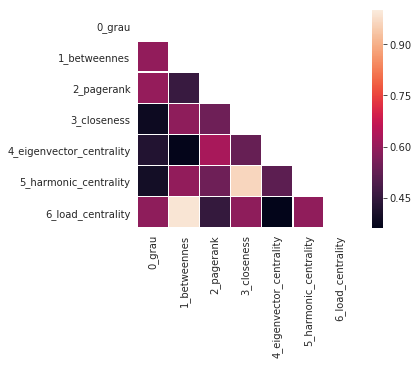

In [22]:
corr = calcKendall(X)
# sns.heatmap(,xticklabels=labels,yticklabels=labels,linewidths=.5)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask,square=True,xticklabels=labels_medidas,yticklabels=labels_medidas,linewidths=.5)

In [29]:
a = np.array(svd_values)
a = a.reshape(len(a),1)
X = np.append(X,a,axis=1)
X.shape

(241, 8)

In [30]:
matrix_teste = X

In [31]:
# Alta correlacao moreno_oz

c_1_6 = calcula_SVD(matrix_teste,1,6)
c_3_5 = calcula_SVD(matrix_teste,3,5)


In [32]:
# Baixa correlacao moreno_innovation
c_0_3 = calcula_SVD(matrix_teste,0,3)
c_0_4 = calcula_SVD(matrix_teste,0,4)
c_0_5 = calcula_SVD(matrix_teste,0,5)

c_1_2 = calcula_SVD(matrix_teste,1,4)
c_1_4 = calcula_SVD(matrix_teste,1,4)

c_6_2 = calcula_SVD(matrix_teste,6,4)
c_6_4 = calcula_SVD(matrix_teste,6,4)



In [33]:
#  adicionando na matrix temporaria moreno_innovation
matrix_teste = np.hstack((matrix_teste, c_1_6[1]))
matrix_teste = np.hstack((matrix_teste, c_3_5[1]))
matrix_teste = np.hstack((matrix_teste, c_0_3[1]))
matrix_teste = np.hstack((matrix_teste, c_0_4[1]))
matrix_teste = np.hstack((matrix_teste, c_0_5[1]))
matrix_teste = np.hstack((matrix_teste, c_1_2[1]))
matrix_teste = np.hstack((matrix_teste, c_1_4[1]))
matrix_teste = np.hstack((matrix_teste, c_6_2[1]))
matrix_teste = np.hstack((matrix_teste, c_6_4[1]))
matrix_teste.shape



(241, 17)

In [34]:
labels = ['0_grau','1_betweennes','2_pagerank','3_closeness','4_eigenvector_centrality','5_harmonic_centrality','6_load_centrality','7_PCA_all','16','35','03','04','05','12','14','62','64']



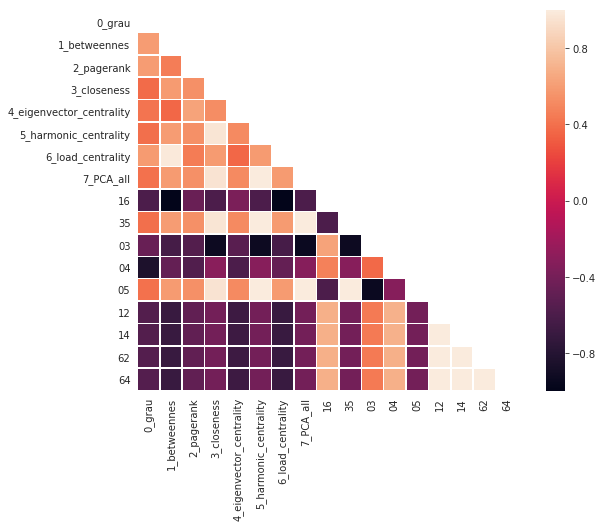

In [35]:
# 
a = plt.figure(figsize=(10,7))
corr = calcKendall(matrix_teste)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask,square=True,xticklabels=labels,yticklabels=labels,linewidths=.5)

In [36]:
vindex = [i for i in range(g.vcount())]

my_list = X
### my_list[0] = grau
### my_list[1] = betweenness
### my_list[2] = pagerank
### my_list[3] = closeness
### my_list[4] = eigenvector_centrality
### my_list[5] = harmonic_centrality
### my_list[6] = load_centrality 
### my_list[7] = PCA_all
### ...etc
aflat, seeds_grau = (list(x) for x in zip(*sorted(zip(my_list[:,0], vindex), reverse=True)))
aflat, seeds_betweennes = (list(x) for x in zip(*sorted(zip(my_list[:,1], vindex), reverse=True)))
aflat, seeds_pagerank = (list(x) for x in zip(*sorted(zip(my_list[:,2], vindex), reverse=True)))
aflat, seeds_closeness = (list(x) for x in zip(*sorted(zip(my_list[:,3], vindex), reverse=True)))
aflat, seeds_eigenvector_centrality = (list(x) for x in zip(*sorted(zip(my_list[:,4], vindex), reverse=True)))
aflat, seeds_harmonic_centrality = (list(x) for x in zip(*sorted(zip(my_list[:,5], vindex), reverse=True)))
aflat, seeds_load_centrality = (list(x) for x in zip(*sorted(zip(my_list[:,6], vindex), reverse=True)))
aflat, seeds_SVD = (list(x) for x in zip(*sorted(zip(svd_values, vindex), reverse=True)))

In [39]:
s = [seeds_grau[:50],seeds_betweennes[:50],
    seeds_pagerank[:50],seeds_closeness[:50],
    seeds_eigenvector_centrality[:50],seeds_harmonic_centrality[:50],
    seeds_load_centrality[:50],seeds_SVD[:50],c_1_6[0][:50],
    c_3_5[0][:50],
    c_0_3[0][:50],
    c_0_4[0][:50],
    c_0_5[0][:50],
    c_1_2[0][:50], 
    c_1_4[0][:50],
    c_6_2[0][:50], 
    c_6_4[0][:50]]
with open('sementes-moreno_innovation-SVD.txt', 'wb') as f:
    pickle.dump(s, f)